# Project: Regex
### this notebook is for educational purpose . in this notebook we will Extract Useful information from messy data using Regex

## Introduction
### Dataset Description
The dataset contains 2 columns:
* ID: A unique identifier for each record.
* Messy Text: A paragraph that contains four personal details:
    * Name
    * Phone Number
    * Date of Birth (DOB)
    * Email

### Task
Your task is to extract the personal information (Name, Phone, Date of Birth, Email) from the messy text.

* Expected Output:

    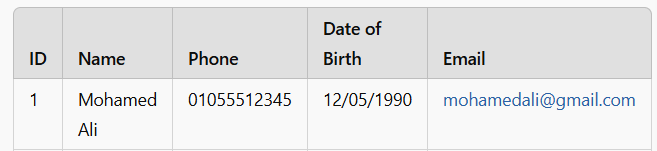


## 1- import packages and load data

In [23]:
import pandas as pd 
import numpy as np
import re

In [24]:
df = pd.read_csv('regex_data.csv')
df.head(5)

,ID,Messy Text
0,1,Mohamed Ali loves football. You can email him ...
1,2,"On 15/08/1985, Ahmed Saad was born. He enjoys ..."
2,3,Sara Mohamed’s phone is 01198765432. She was b...
3,4,"Fatima ElSayed, an architect, was born on 07/0..."
4,5,Mohamed Khalil runs a shop. Call him at 015112...


## 2- Extract the name [First + second] and add it as column

In [25]:
def extract_name(text):
    match = re.search(r'\b([A-Z][a-z]+)\s+([A-Z][a-z]+)\b', text)
    if match:
        return f"{match.group(1)} {match.group(2)}"
    return "Missed"

In [26]:
df["Name"] = df["Messy Text"].apply(extract_name)

In [27]:
df.to_csv("final_file.csv", index=False)

In [28]:
df.head(5)

,ID,Messy Text,Name
0,1,Mohamed Ali loves football. You can email him ...,Mohamed Ali
1,2,"On 15/08/1985, Ahmed Saad was born. He enjoys ...",Ahmed Saad
2,3,Sara Mohamed’s phone is 01198765432. She was b...,Sara Mohamed
3,4,"Fatima ElSayed, an architect, was born on 07/0...",Missed
4,5,Mohamed Khalil runs a shop. Call him at 015112...,Mohamed Khalil


## 3- Extract the Date of Birth and add it as column

In [29]:
def extract_dob(text):
    match = re.search(r'(\d{1,2}[-/]\d{1,2}[-/]\d{4}|\d{4}[-/]\d{1,2}[-/]\d{1,2})', text)
    if match:
        return match.group(1)
    return "Missed"

In [30]:
df["Date_of_Birth"] = df["Messy Text"].apply(extract_dob)

In [31]:
df.to_csv("final_file.csv", index=False)

In [32]:
df.head(5)

,ID,Messy Text,Name,Date_of_Birth
0,1,Mohamed Ali loves football. You can email him ...,Mohamed Ali,12/05/1990
1,2,"On 15/08/1985, Ahmed Saad was born. He enjoys ...",Ahmed Saad,15/08/1985
2,3,Sara Mohamed’s phone is 01198765432. She was b...,Sara Mohamed,30/12/1988
3,4,"Fatima ElSayed, an architect, was born on 07/0...",Missed,07/07/1992
4,5,Mohamed Khalil runs a shop. Call him at 015112...,Mohamed Khalil,20/01/1980


## 4- Extract the Phone Number and add it as column

In [33]:
def extract_phone(text):
    match = re.search(r'(\+?\d{1,3}[-.\s]?\(?\d{2,3}\)?[-.\s]?\d{3,4}[-.\s]?\d{4})', text)
    if match:
        return match.group(1)
    return "Missed"

In [34]:
df["Phone"] = df["Messy Text"].apply(extract_phone)

In [35]:
df.to_csv("final_file.csv", index=False)

In [36]:
df.head(5)

,ID,Messy Text,Name,Date_of_Birth,Phone
0,1,Mohamed Ali loves football. You can email him ...,Mohamed Ali,12/05/1990,01055512345
1,2,"On 15/08/1985, Ahmed Saad was born. He enjoys ...",Ahmed Saad,15/08/1985,01023456789
2,3,Sara Mohamed’s phone is 01198765432. She was b...,Sara Mohamed,30/12/1988,01198765432
3,4,"Fatima ElSayed, an architect, was born on 07/0...",Missed,07/07/1992,01234567890
4,5,Mohamed Khalil runs a shop. Call him at 015112...,Mohamed Khalil,20/01/1980,01511223344


## 5- Extract the Email and add it as column

In [37]:
def extract_email(text):
    match = re.search(r'[\w\.-]+@[\w\.-]+\.\w+', text)
    if match:
        return match.group(0)
    return "Missed"

In [38]:
df["Email"] = df["Messy Text"].apply(extract_email)

In [39]:
df.to_csv("final_file.csv", index=False)

In [40]:
df.head(5)

,ID,Messy Text,Name,Date_of_Birth,Phone,Email
0,1,Mohamed Ali loves football. You can email him ...,Mohamed Ali,12/05/1990,01055512345,mohamedali@gmail.com
1,2,"On 15/08/1985, Ahmed Saad was born. He enjoys ...",Ahmed Saad,15/08/1985,01023456789,ahmedsaad@yahoo.com
2,3,Sara Mohamed’s phone is 01198765432. She was b...,Sara Mohamed,30/12/1988,01198765432,sara.mohamed@gmail.com
3,4,"Fatima ElSayed, an architect, was born on 07/0...",Missed,07/07/1992,01234567890,fatimaelsayed@outlook.com
4,5,Mohamed Khalil runs a shop. Call him at 015112...,Mohamed Khalil,20/01/1980,01511223344,mohamed.khalil@gmail.com


## 6- Drop the Messy text column

In [41]:
df.drop(columns=["Messy Text"], inplace=True)

In [42]:
df.to_csv("final_file.csv", index=False)

In [43]:
df.head(5)

,ID,Name,Date_of_Birth,Phone,Email
0,1,Mohamed Ali,12/05/1990,01055512345,mohamedali@gmail.com
1,2,Ahmed Saad,15/08/1985,01023456789,ahmedsaad@yahoo.com
2,3,Sara Mohamed,30/12/1988,01198765432,sara.mohamed@gmail.com
3,4,Missed,07/07/1992,01234567890,fatimaelsayed@outlook.com
4,5,Mohamed Khalil,20/01/1980,01511223344,mohamed.khalil@gmail.com


## 7- Show The cleaned data

In [44]:
df.style.hide(axis='index')

ID,Name,Date_of_Birth,Phone,Email
1,Mohamed Ali,12/05/1990,01055512345,mohamedali@gmail.com
2,Ahmed Saad,15/08/1985,01023456789,ahmedsaad@yahoo.com
3,Sara Mohamed,30/12/1988,01198765432,sara.mohamed@gmail.com
4,Missed,07/07/1992,01234567890,fatimaelsayed@outlook.com
5,Mohamed Khalil,20/01/1980,01511223344,mohamed.khalil@gmail.com
6,Ahmed Mostafa,12/09/1991,01012345678,ahmed.mostafa@gmail.com
7,Yasmin Hossam,03/11/1993,01122334455,yasmin.hossam@hotmail.com
8,Mohamed Gamal,15/06/1987,01234567891,mohamed.gamal@gmail.com
9,Salma Nasr,12/05/1994,01599887766,salma.nasr@gmail.com
10,Khalid Omar,22/08/1982,01099887766,khalid.omar@outlook.com


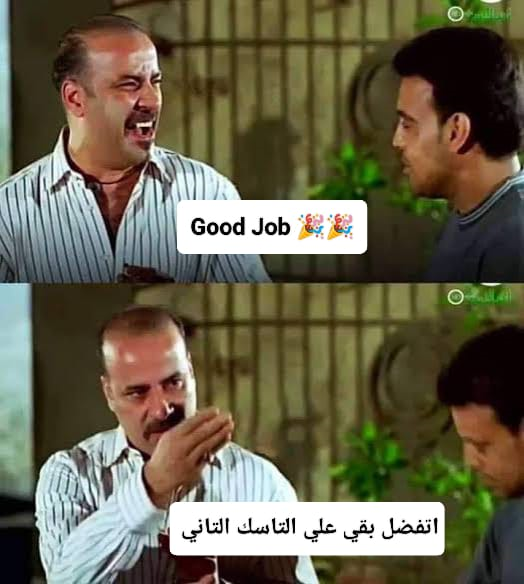